In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('loan_data.csv')
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:>

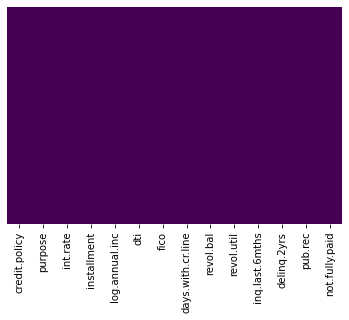

In [3]:
# Check if we have any null Data in the data set
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
pairPlotData = data.drop('purpose',axis=1)

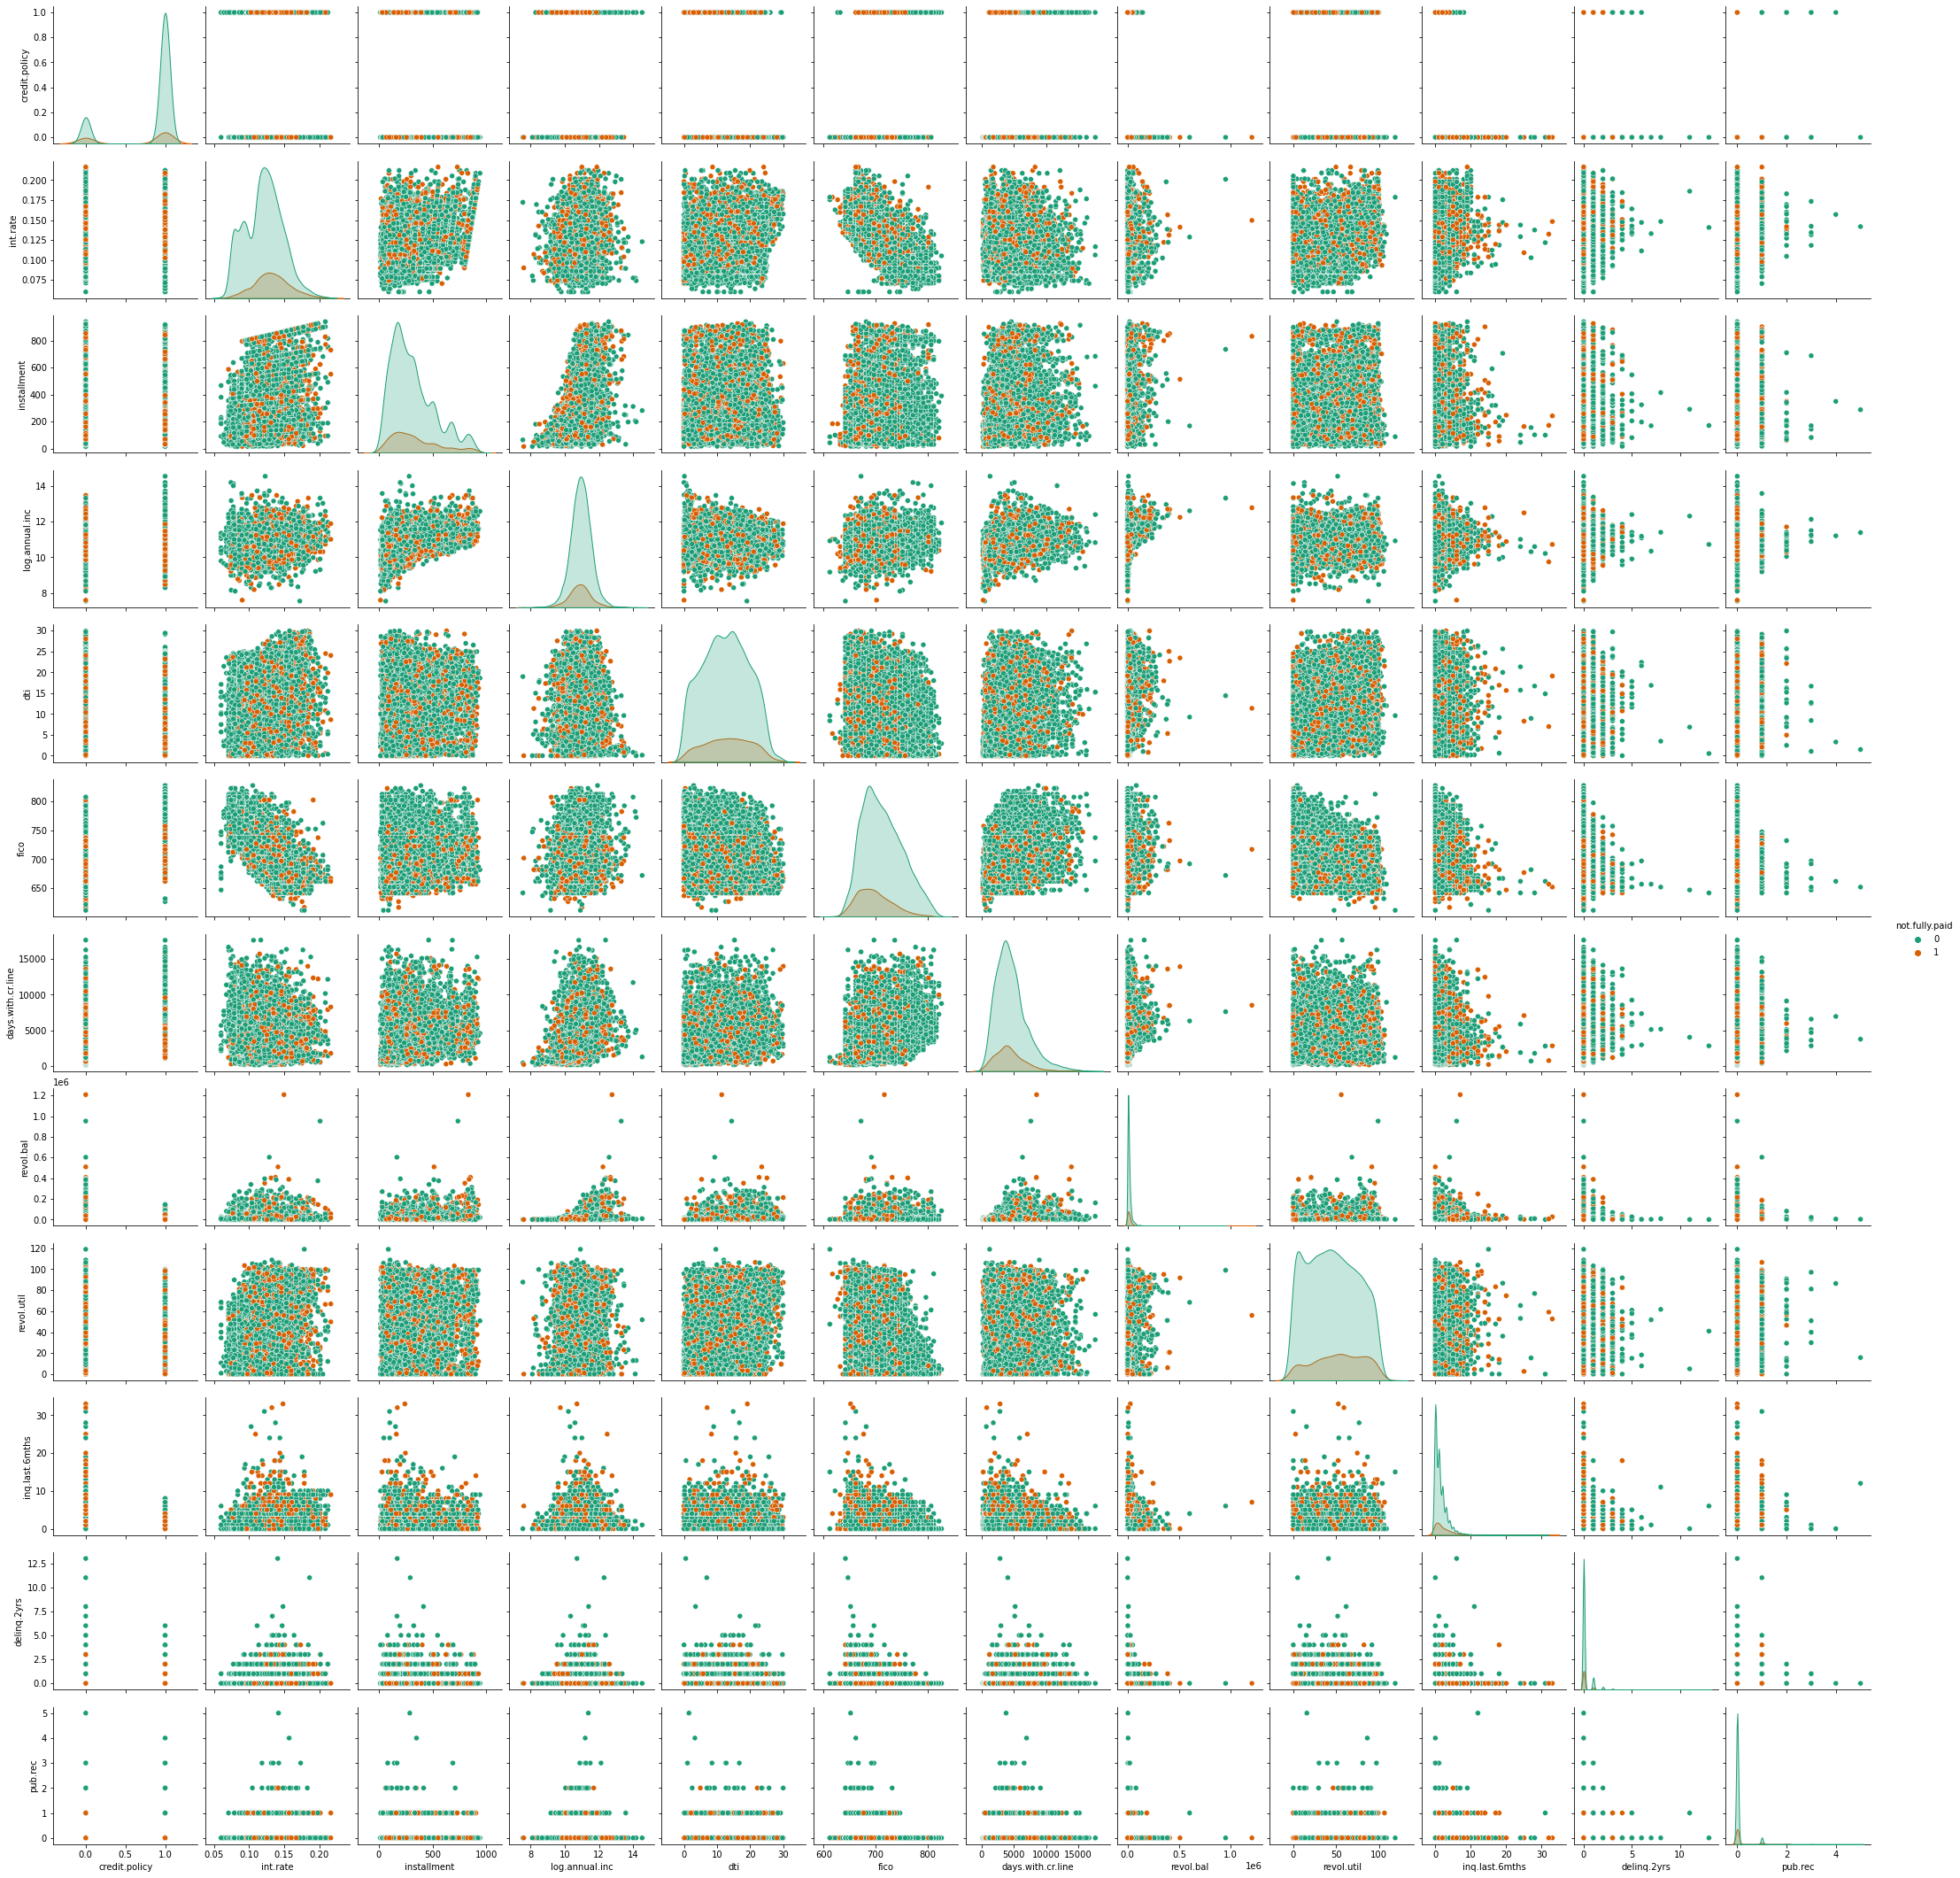

In [5]:
# Check if the target is separable.
sns.pairplot(pairPlotData,hue='not.fully.paid',palette='Dark2')

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

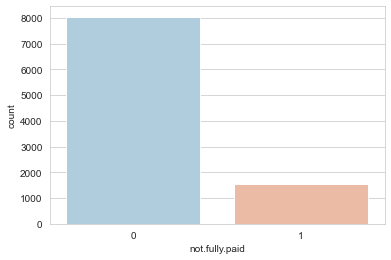

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',data=data,palette='RdBu_r')

Text(0.5, 0, 'FICO')

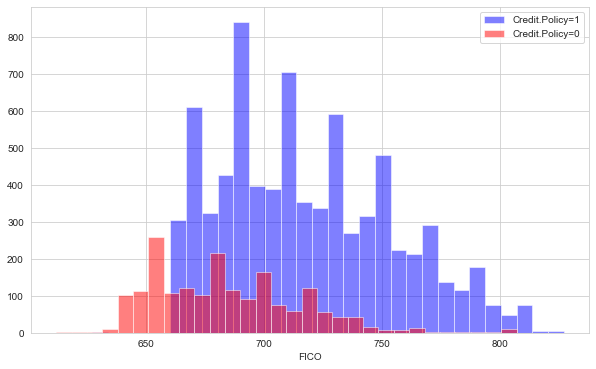

In [7]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

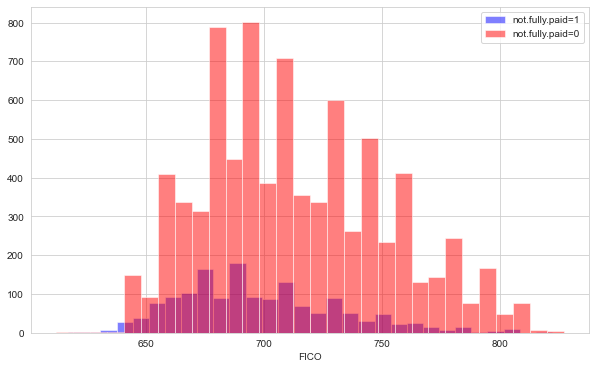

In [8]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

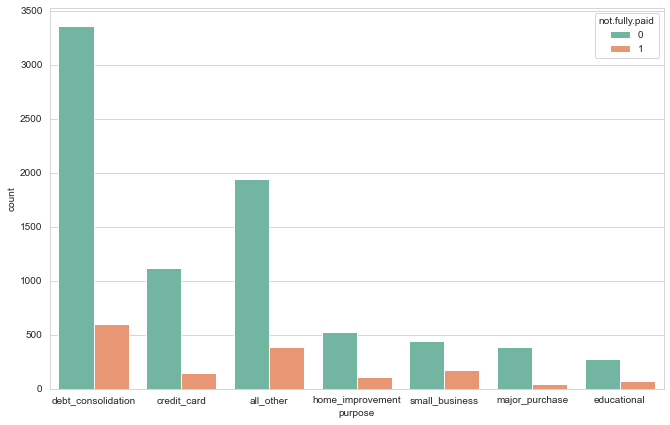

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=data,palette='Set2')

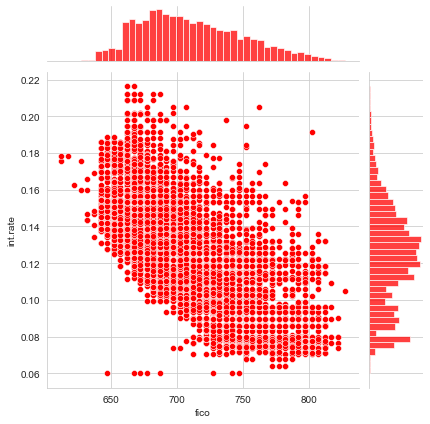

In [10]:
sns.jointplot(x='fico',y='int.rate',data=data,color='red')

<Figure size 792x504 with 0 Axes>

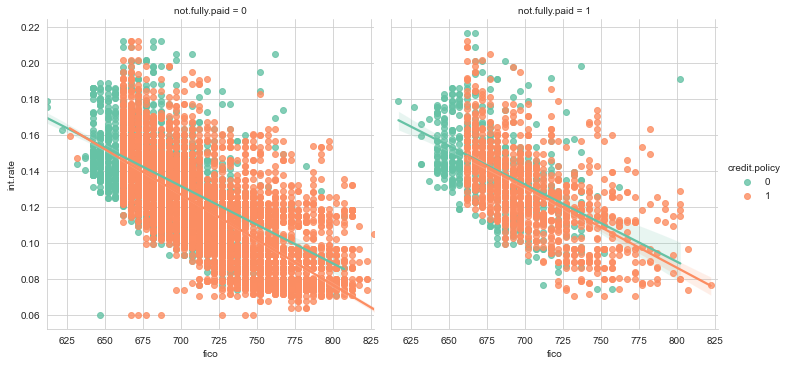

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data,hue='credit.policy',
           col='not.fully.paid',palette='Set2')

In [12]:
cat_feats = ['purpose']
data = pd.get_dummies(data,columns=cat_feats,drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874

------------------------------------------------------------------
Confusion Matrix:
[[1995  436]
 [ 341  102]]
------------------------------------------------------------------
Accuracy: 0.7296450939457203
------------------------------------------------------------------
roc_auc_score for DecisionTree:  0.5254491226473699


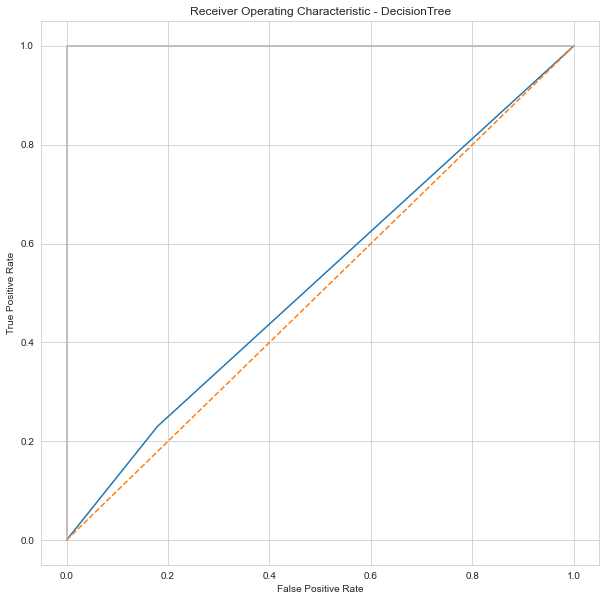

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = dtree.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Criterion=gini 0.7317327766179541
Criterion=entropy 0.7338204592901879


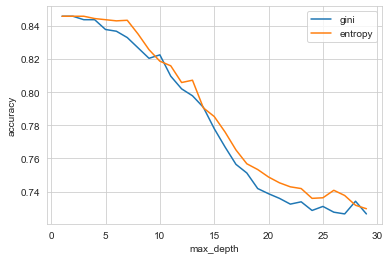

In [15]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.40      0.03      0.06       443

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.49      2874
weighted avg       0.78      0.84      0.78      2874

------------------------------------------------------------------
Confusion Matrix:
[[2410   21]
 [ 429   14]]
------------------------------------------------------------------
Accuracy: 0.8434237995824635
------------------------------------------------------------------
roc_auc_score for DecisionTree(depth = 7 & criterion = entropy):  0.6082616095894545


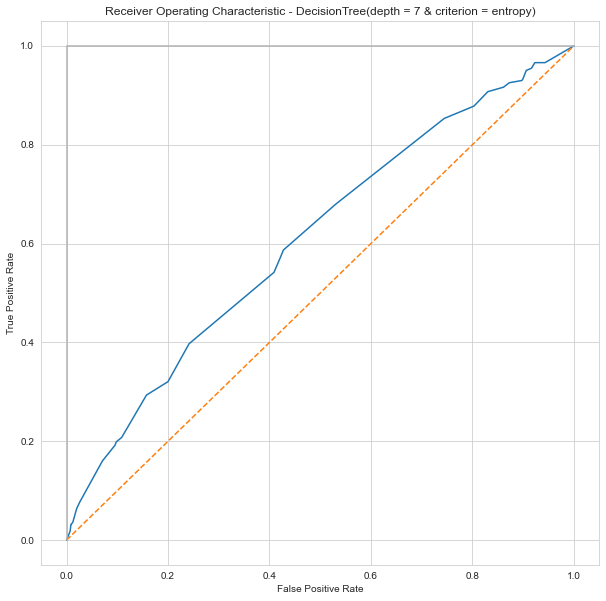

In [16]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = dtree.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree(depth = 7 & criterion = entropy): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree(depth = 7 & criterion = entropy)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2431
           1       0.20      0.22      0.21       443

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874

------------------------------------------------------------------
Confusion Matrix:
[[2045  386]
 [ 346   97]]
------------------------------------------------------------------
Accuracy: 0.7453027139874739
------------------------------------------------------------------
roc_auc_score for KNeighborsClassifier:  0.5300896156028276


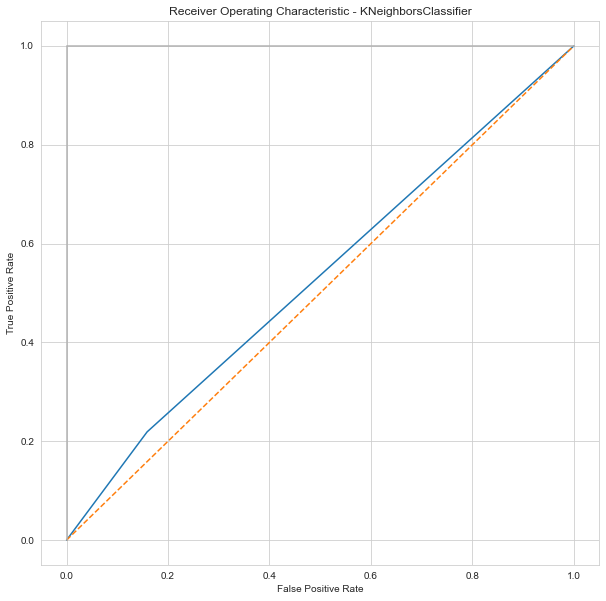

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
 

predictions = knn.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNeighborsClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Text(0, 0.5, 'Error Rate')

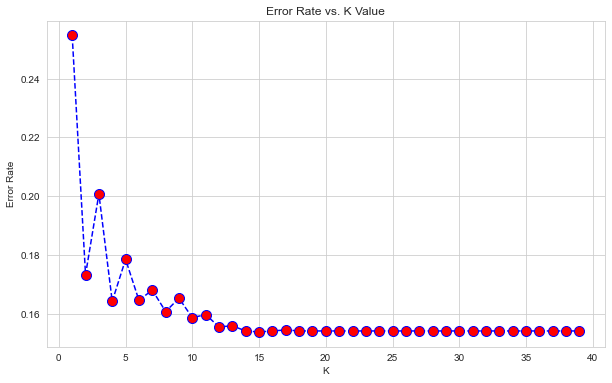

In [18]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.67      0.00      0.01       443

    accuracy                           0.85      2874
   macro avg       0.76      0.50      0.46      2874
weighted avg       0.82      0.85      0.78      2874

------------------------------------------------------------------
Confusion Matrix:
[[2430    1]
 [ 441    2]]
------------------------------------------------------------------
Accuracy: 0.8462073764787752
------------------------------------------------------------------
roc_auc_score for KNeighborsClassifier (N = 15):  0.5219934759172575


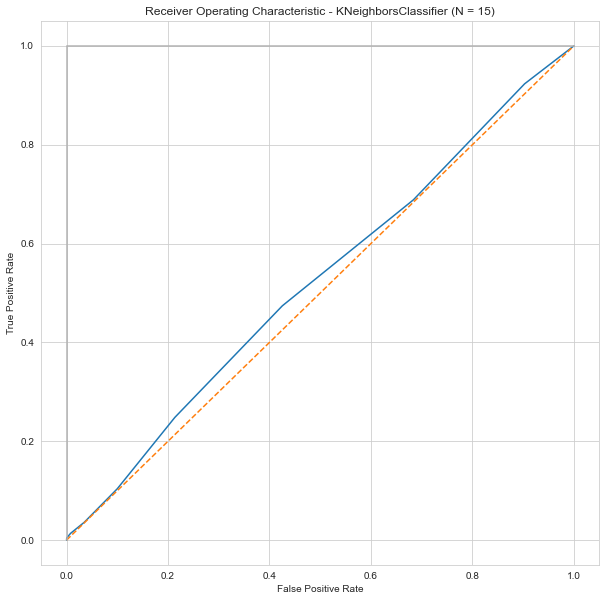

In [19]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNeighborsClassifier (N = 15): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier (N = 15)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       1.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.78      2874

------------------------------------------------------------------
Confusion Matrix:
[[2431    0]
 [ 442    1]]
------------------------------------------------------------------
Accuracy: 0.8462073764787752
------------------------------------------------------------------
roc_auc_score for svm (kernel = rbf):  0.5229368957957459


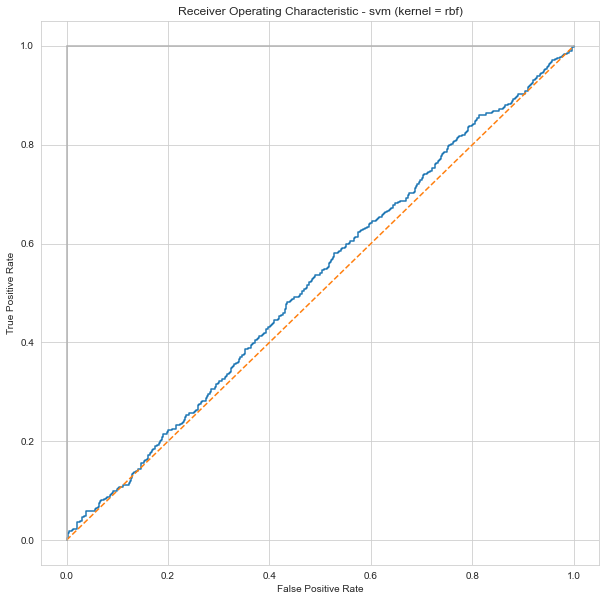

In [20]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',probability=True)
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = svc_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for svm (kernel = rbf): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm (kernel = rbf)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# svc_model = SVC(kernel='sigmoid',probability=True)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.9s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2431
           1       0.14      0.12      0.13       443

    accuracy                           0.75      2874
   macro avg       0.49      0.49      0.49      2874
weighted avg       0.74      0.75      0.74      2874

------------------------------------------------------------------
Confusion Matrix:
[[2117  314]
 [ 391   52]]
------------------------------------------------------------------
Accuracy: 0.7546972860125261
------------------------------------------------------------------
roc_auc_score for svm (kernel = sigmoid):  0.46821668571768166


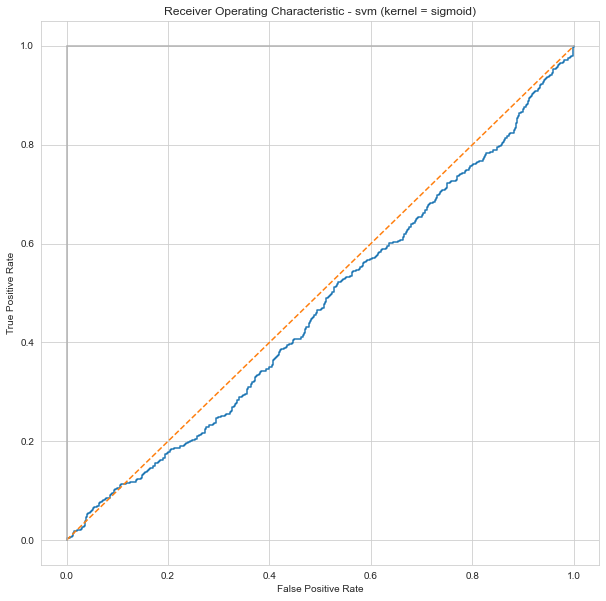

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

------------------------------------------------------------------
Confusion Matrix:
[[2431    0]
 [ 443    0]]
------------------------------------------------------------------
Accuracy: 0.8458594293667363
------------------------------------------------------------------


/Users/alfredzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.svm import SVC
svc_model = SVC(kernel='sigmoid',probability=True)
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = svc_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for svm (kernel = sigmoid): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm (kernel = sigmoid)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



grid_predictions = grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,grid_predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,grid_predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, grid_predictions))
print('------------------------------------------------------------------')



In [23]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, 
                                        max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.837
Accuracy score (validation): 0.846
Learning rate:  0.075
Accuracy score (training): 0.837
Accuracy score (validation): 0.846
Learning rate:  0.1
Accuracy score (training): 0.837
Accuracy score (validation): 0.846
Learning rate:  0.25
Accuracy score (training): 0.839
Accuracy score (validation): 0.846
Learning rate:  0.5
Accuracy score (training): 0.841
Accuracy score (validation): 0.843
Learning rate:  0.75
Accuracy score (training): 0.842
Accuracy score (validation): 0.838
Learning rate:  1
Accuracy score (training): 0.842
Accuracy score (validation): 0.836


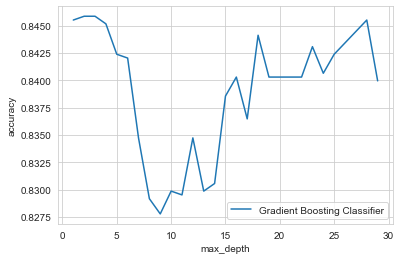

In [24]:
max_depth = []
acc = []

for i in range(1,30):
 dtree = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=i, random_state=0)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc.append(accuracy_score(y_test, pred))

 ####
 max_depth.append(i)
d = pd.DataFrame({'acc':pd.Series(acc),
 'acc':pd.Series(acc),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

plt.plot('max_depth','acc', data=d, label='Gradient Boosting Classifier')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.44      0.04      0.08       443

    accuracy                           0.84      2874
   macro avg       0.65      0.52      0.50      2874
weighted avg       0.79      0.84      0.79      2874

------------------------------------------------------------------
Confusion Matrix:
[[2407   24]
 [ 424   19]]
------------------------------------------------------------------
Accuracy: 0.8441196938065414
------------------------------------------------------------------
roc_auc_score for GradientBoostingClassifier:  0.6128245675450562


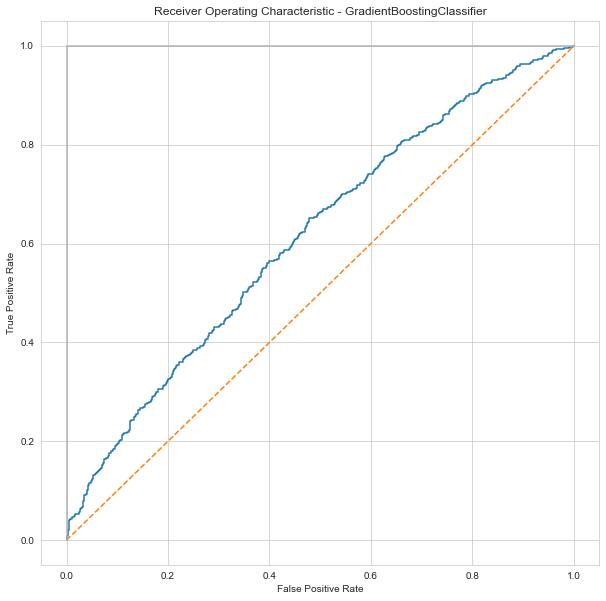

In [25]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=18, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = gb_clf2.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2431
           1       0.19      0.34      0.24       443

    accuracy                           0.67      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.67      0.71      2874

------------------------------------------------------------------
Confusion Matrix:
[[1782  649]
 [ 294  149]]
------------------------------------------------------------------
Accuracy: 0.6718858733472513
------------------------------------------------------------------
roc_auc_score for MLPClassifier:  0.5539499671753024


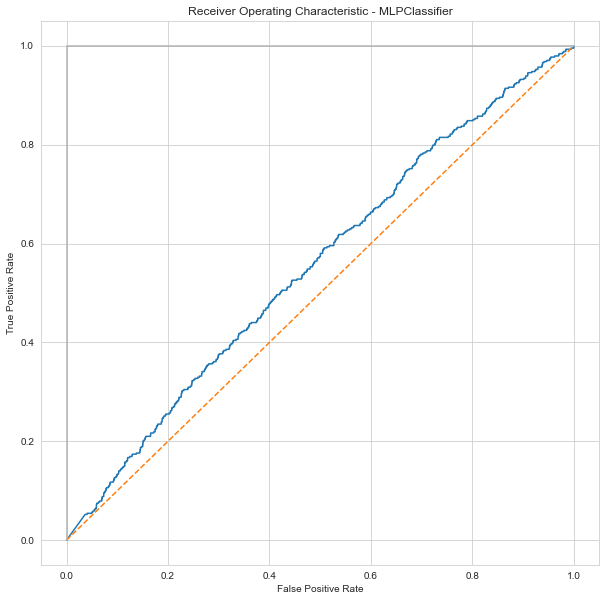

In [26]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = mlp.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for MLPClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - MLPClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()